### XGBoost PGA

Mean Squared Error: 0.06269273463666347
R² Score: 0.9022862710642703


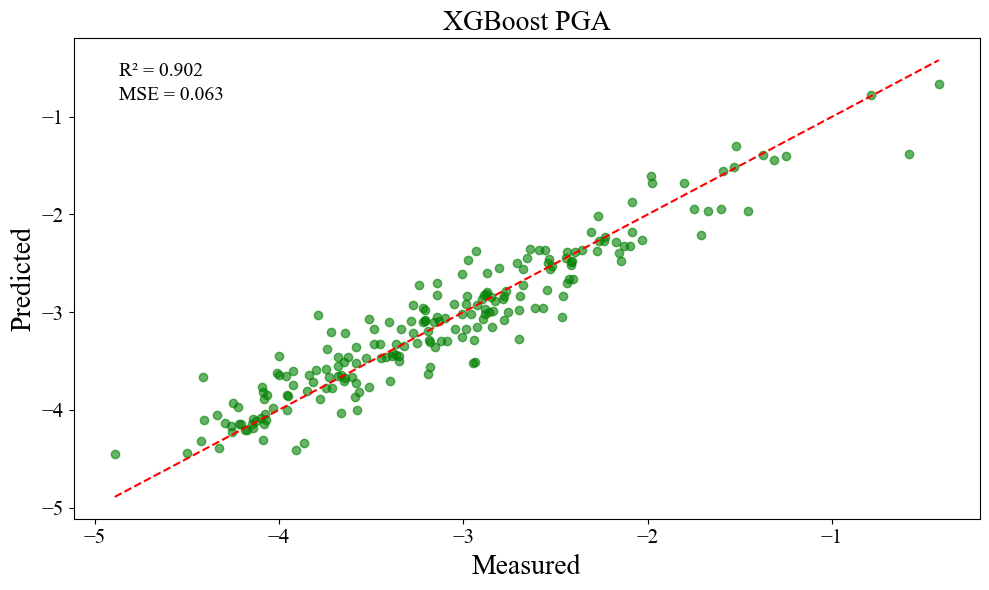

In [10]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 파일 경로
file_path = '../earthquake_data/x_nan_2.xlsx'

# 데이터 로드
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트와 'o2' 시트 데이터 추출
i2_data = data['i2']
o2_data = data['o2']

# 필요한 컬럼만 추출
X = i2_data[['Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'dVI', 'Vs30']]
y = o2_data['1c']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (Mean Squared Error and R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 성능 평가 출력
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 1:1 line
plt.title('XGBoost PGA', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()


### 다양한 모델


Training and evaluating XGBoost...
XGBoost - Mean Squared Error: 0.06269273463666347
XGBoost - R² Score: 0.9022862710642703


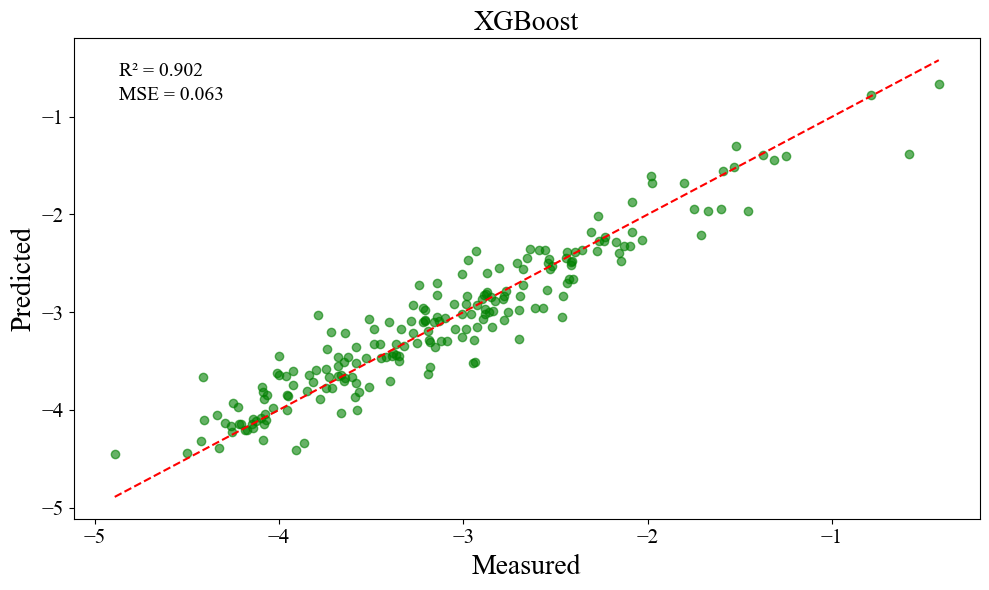


Training and evaluating Random Forest...
Random Forest - Mean Squared Error: 0.08650854537833216
Random Forest - R² Score: 0.8651666321031852


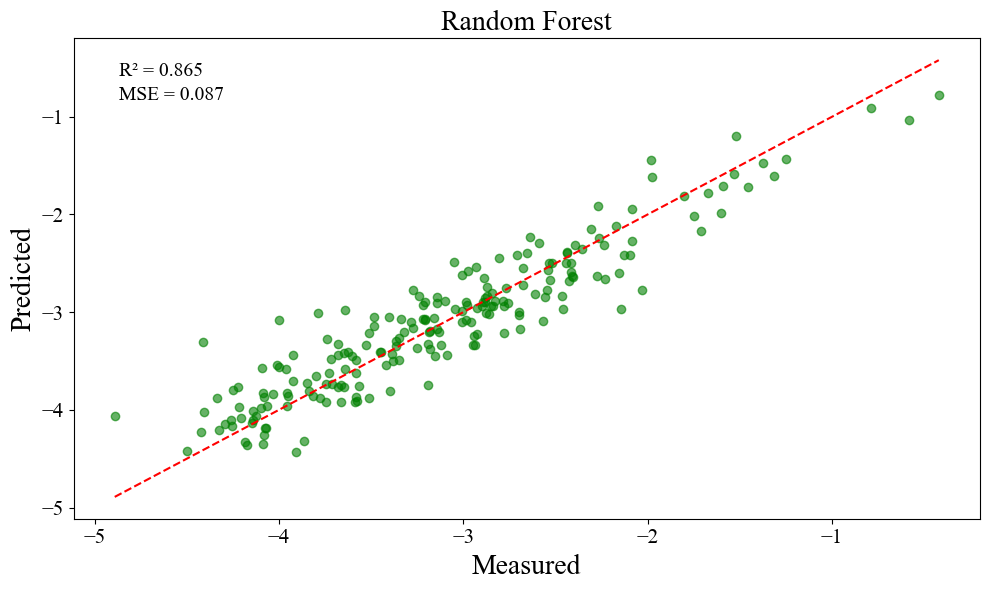


Training and evaluating Linear Regression...
Linear Regression - Mean Squared Error: 0.12866332514721232
Linear Regression - R² Score: 0.7994636324246094


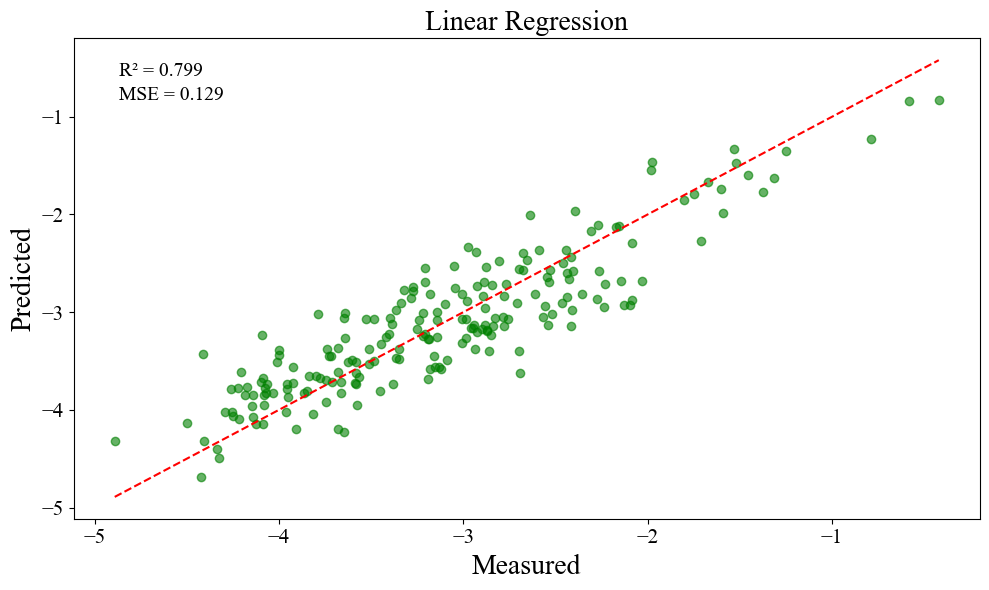


Training and evaluating Support Vector Regressor...
Support Vector Regressor - Mean Squared Error: 0.36409557425790623
Support Vector Regressor - R² Score: 0.43251580177633575


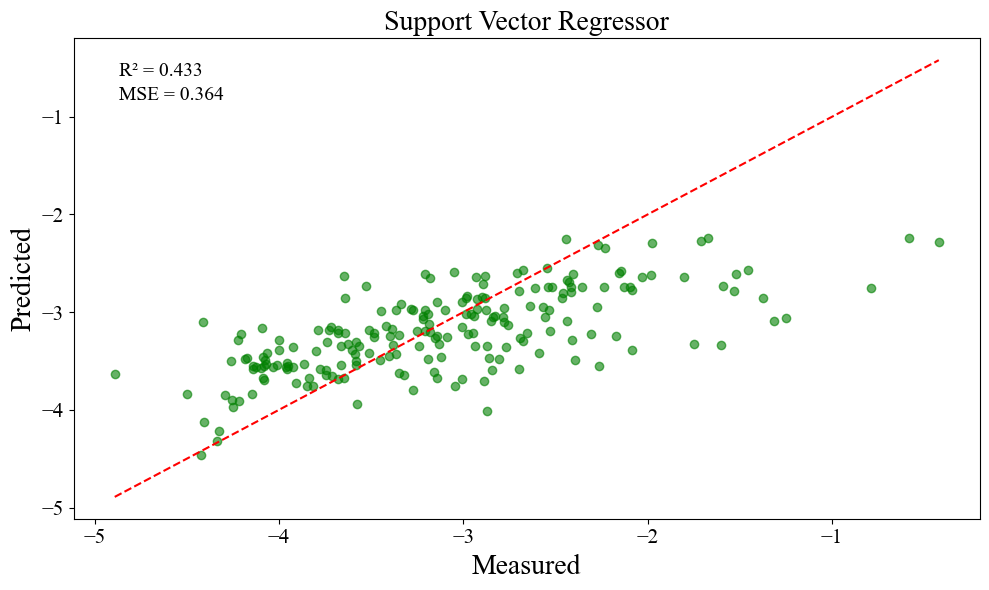

In [23]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 파일 경로
file_path = '../earthquake_data/x_nan_2.xlsx'

# 데이터 로드
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트와 'o2' 시트 데이터 추출
i2_data = data['i2']
o2_data = data['o2']

# 필요한 컬럼만 추출
X = i2_data[['Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'dVI', 'Vs30']]
y = o2_data['1c']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델들 정의
models = {
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6),
    "Random Forest": RandomForestRegressor(n_estimators=1000, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# 모델 학습 및 평가
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가 (Mean Squared Error and R²)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 성능 평가 출력
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R² Score: {r2}")
    
    # 실제값 vs 예측값 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='green')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 1:1 line
    plt.title(f'{model_name}', fontsize=20)
    plt.xlabel('Measured', fontsize=20)
    plt.ylabel('Predicted', fontsize=20)
    
    # X, Y 축 눈금 글씨 크기 조정
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    # R²과 MSE 텍스트로 추가
    plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
    plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()


### XGBoost PGA SHAP

Mean Squared Error: 0.06269273463666347
R² Score: 0.9022862710642703


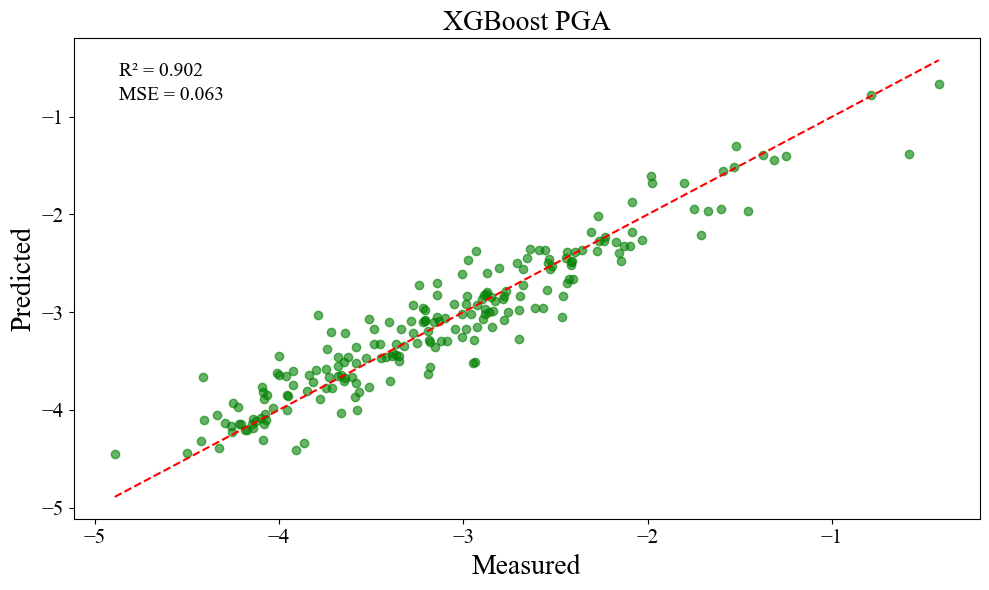

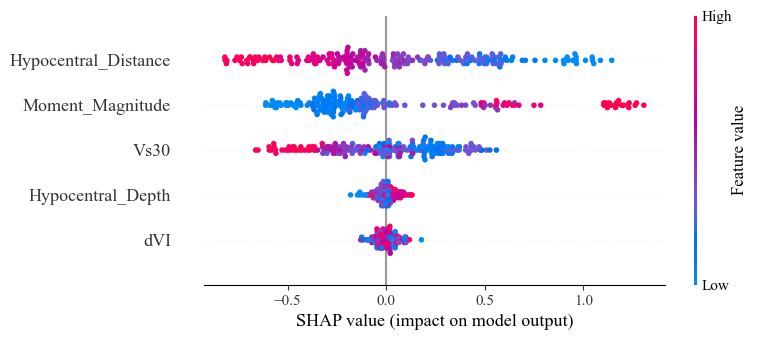

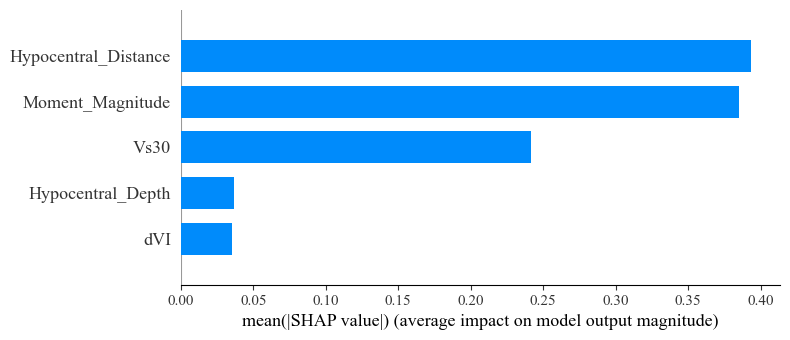

In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap  # SHAP 라이브러리 추가

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 파일 경로
file_path = '../earthquake_data/x_nan_2.xlsx'

# 데이터 로드
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트와 'o2' 시트 데이터 추출
i2_data = data['i2']
o2_data = data['o2']

# 필요한 컬럼만 추출
X = i2_data[['Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'dVI', 'Vs30']]
y = o2_data['1c']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (Mean Squared Error and R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 성능 평가 출력
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 1:1 line
plt.title('XGBoost PGA', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

# SHAP 값 계산
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Summary Plot (평균 SHAP 값)
shap.summary_plot(shap_values, X_test, plot_type='bar')


### XGBoost PSA 0.2T

Mean Squared Error: 0.06569577433150577
R² Score: 0.8860878661163891


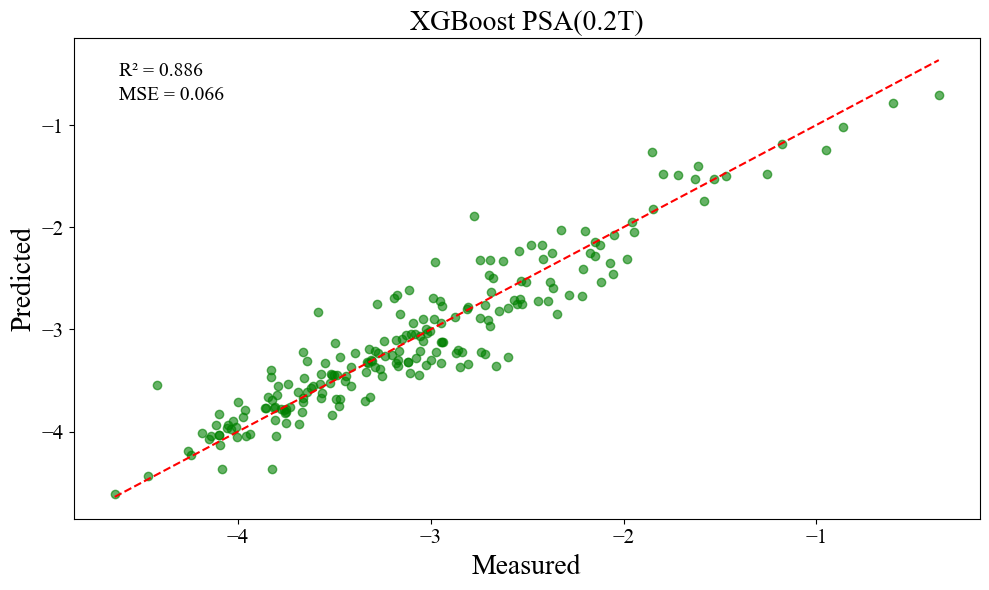

In [12]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 파일 경로
file_path = '../earthquake_data/x_nan_2.xlsx'

# 데이터 로드
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트와 'o2' 시트 데이터 추출
i2_data = data['i2']
o2_data = data['o2']

# 필요한 컬럼만 추출
X = i2_data[['Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'dVI', 'Vs30']]
y = o2_data['15c']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (Mean Squared Error and R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 성능 평가 출력
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 1:1 line
plt.title('XGBoost PSA(0.2T)', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()


### XGBoost PSA 1T

Mean Squared Error: 0.06004492474638273
R² Score: 0.9257866060888035


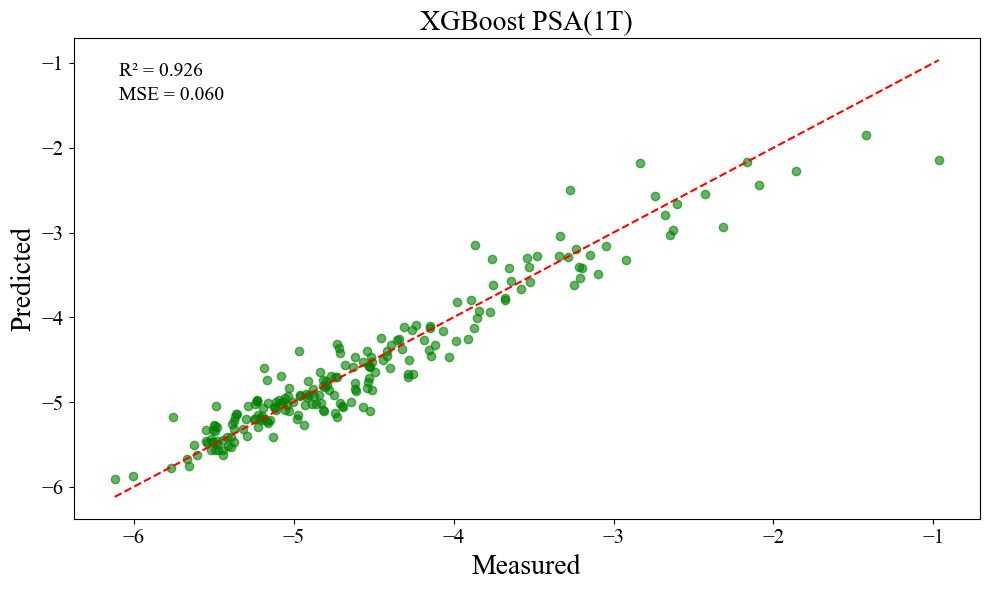

In [14]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 파일 경로
file_path = '../earthquake_data/x_nan_2.xlsx'

# 데이터 로드
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트와 'o2' 시트 데이터 추출
i2_data = data['i2']
o2_data = data['o2']

# 필요한 컬럼만 추출
X = i2_data[['Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'dVI', 'Vs30']]
y = o2_data['22c']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (Mean Squared Error and R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 성능 평가 출력
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 1:1 line
plt.title('XGBoost PSA(1T)', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()


### Equation PGA

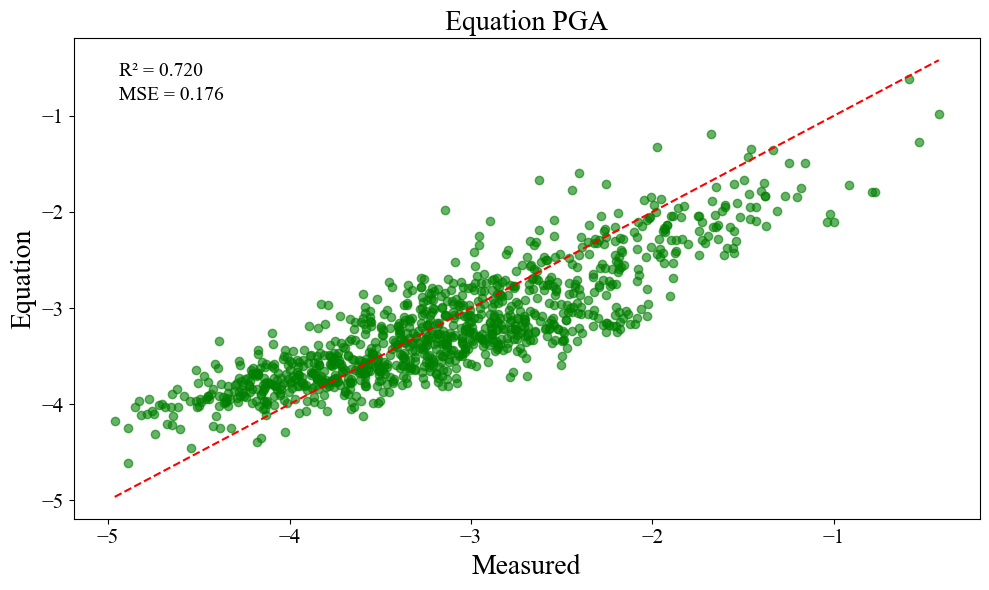

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['1c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_o2, y_eo2, alpha=0.6, color='green')
plt.plot([min(y_o2), max(y_o2)], [min(y_o2), max(y_o2)], '--', color='red')  # 1:1 line
plt.title('Equation PGA', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Equation', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

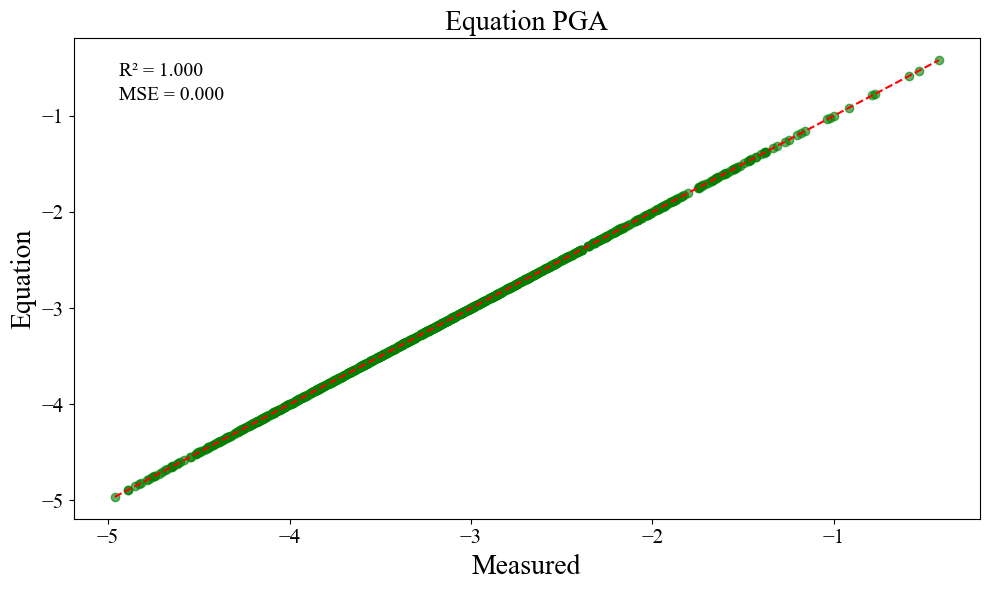

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 데이터 로드
file_path = '../earthquake_data/x_nan_2 (1).xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['1c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_o2, y_eo2, alpha=0.6, color='green')
plt.plot([min(y_o2), max(y_o2)], [min(y_o2), max(y_o2)], '--', color='red')  # 1:1 line
plt.title('Equation PGA', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Equation', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

### Equation PSA 0.2T

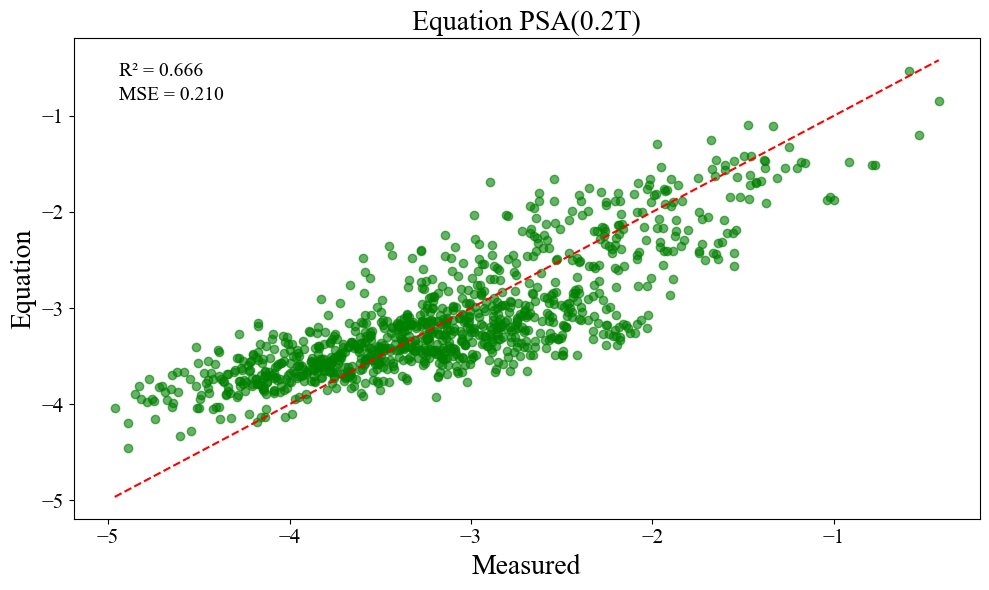

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['15c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_o2, y_eo2, alpha=0.6, color='green')
plt.plot([min(y_o2), max(y_o2)], [min(y_o2), max(y_o2)], '--', color='red')  # 1:1 line
plt.title('Equation PSA(0.2T)', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Equation', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

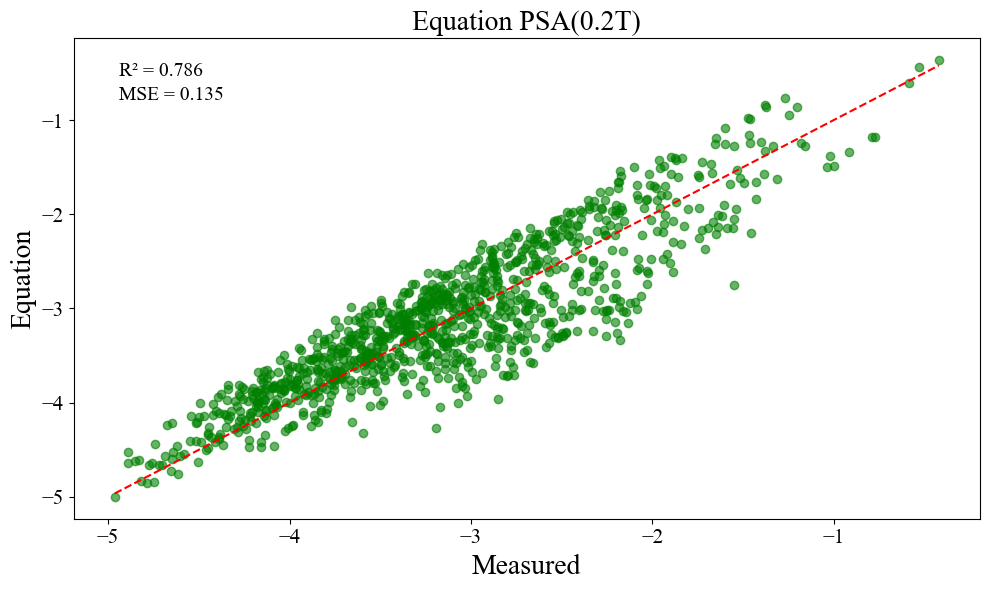

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 데이터 로드
file_path = '../earthquake_data/x_nan_2 (1).xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['15c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_o2, y_eo2, alpha=0.6, color='green')
plt.plot([min(y_o2), max(y_o2)], [min(y_o2), max(y_o2)], '--', color='red')  # 1:1 line
plt.title('Equation PSA(0.2T)', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Equation', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

### Equation PSA 1T

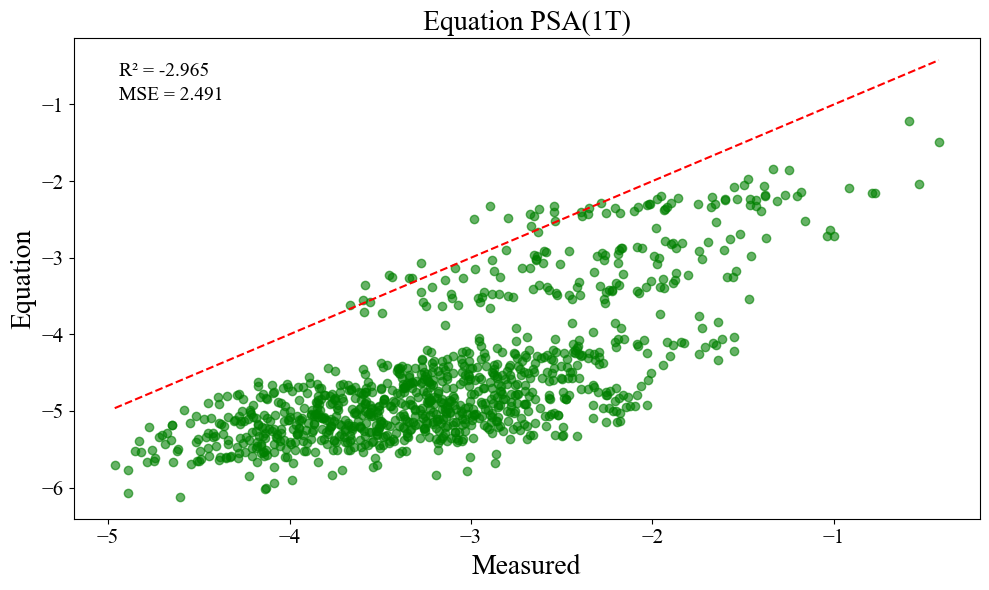

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['22c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_o2, y_eo2, alpha=0.6, color='green')
plt.plot([min(y_o2), max(y_o2)], [min(y_o2), max(y_o2)], '--', color='red')  # 1:1 line
plt.title('Equation PSA(1T)', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Equation', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()

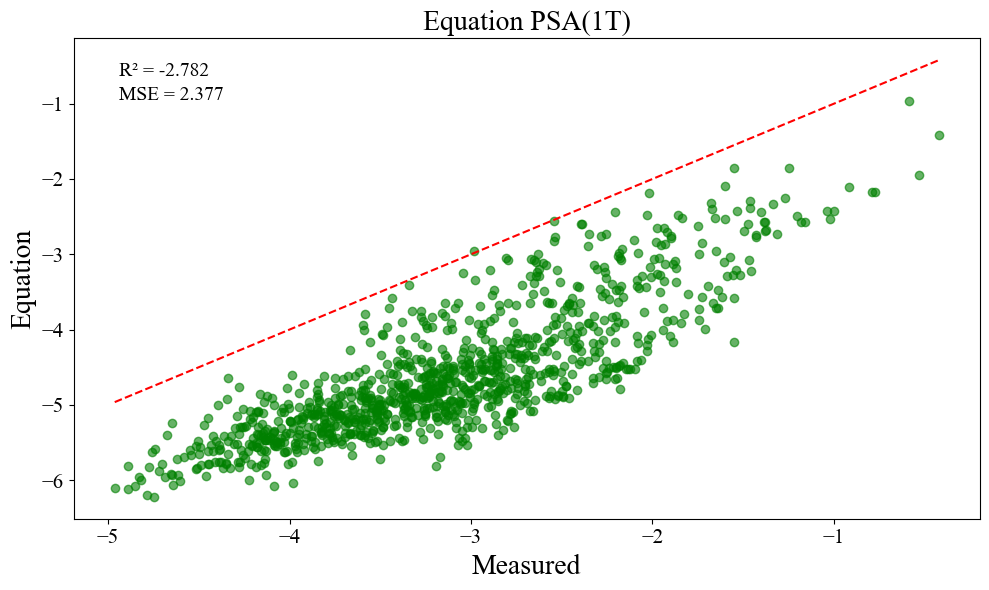

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import font_manager

# 폰트 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'

# 데이터 로드
file_path = '../earthquake_data/x_nan_2 (1).xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['22c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_o2, y_eo2, alpha=0.6, color='green')
plt.plot([min(y_o2), max(y_o2)], [min(y_o2), max(y_o2)], '--', color='red')  # 1:1 line
plt.title('Equation PSA(1T)', fontsize=20)
plt.xlabel('Measured', fontsize=20)
plt.ylabel('Equation', fontsize=20)

# X, Y 축 눈금 글씨 크기 조정
plt.tick_params(axis='both', which='major', labelsize=15)

# R²과 MSE 텍스트로 추가
plt.text(0.05, 0.95, f'R² = {r2:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.90, f'MSE = {mse:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()